<a href="https://colab.research.google.com/github/Payal2000/Advanced-Data-Science-INFO-7390/blob/main/Understanding_Data_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **About the dataset**

The dataset contains credit card transaction information with the following key columns:

- **CUST_ID:** The unique identifier for the customer.
- **BALANCE:** The balance left on the credit card.
- **BALANCE_FREQUENCY:** The frequency of balance updates.
- **PURCHASES:** Total amount of purchases made.
- **ONEOFF_PURCHASES:** Total amount of one-time purchases.
- **INSTALLMENTS_PURCHASES:** Total amount of purchases made in installments.
- **CASH_ADVANCE**: The cash advance taken by the customer.
- **PURCHASES_FREQUENCY:** How often the customer makes purchases.
- **ONEOFF_PURCHASES_FREQUENCY:** Frequency of one-time purchases.
- **PURCHASES_INSTALLMENTS_FREQUENCY:** Frequency of installment purchases.
- **CASH_ADVANCE_FREQUENCY**: Frequency of cash advances.
- **CASH_ADVANCE_TRX:** Number of cash advance transactions.
- **PURCHASES_TRX:** Number of purchase transactions.
- **CREDIT_LIMIT:** The credit limit of the customer.
- **PAYMENTS:** The total amount paid by the customer.
- **MINIMUM_PAYMENTS:** The minimum payment required.
- **PRC_FULL_PAYMENT**: Percentage of full payment made by the customer.
- **TENURE:** How long the customer has been with the service (in months).


In [ ]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107721 sha256=6d9a1615917204e1f328f173f8cc0aa46c83c64a4a2959f11bd31485dc9739d5
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
#Loading the required libraries
import numpy as np
import matplotlib as mlt
import seaborn as sns
from matplotlib import gridspec
from matplotlib import rcParams
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.stats import multivariate_normal
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas.testing as tm
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import statsmodels.api as sd
from sklearn import tree
import sklearn.metrics as sm
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
file_url = "https://raw.githubusercontent.com/Payal2000/Advanced-Data-Science-INFO-7390/refs/heads/main/general.csv"
data = pd.read_csv(file_url)


### **Understanding the dataset**

In [ ]:
data.shape

(8950, 18)

The Dataframe has **8950 rows** with **18 attributes**.

We wil review these further attributes to identify which ones would actually be important and what data manipulation needs to be carried out before Exploratory analysis and prediction modelling

In [ ]:
#Reading first 5 rows
data.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [ ]:
# Check variable data types
data.dtypes

,0
CUST_ID,object
BALANCE,float64
BALANCE_FREQUENCY,float64
PURCHASES,float64
ONEOFF_PURCHASES,float64
INSTALLMENTS_PURCHASES,float64
CASH_ADVANCE,float64
PURCHASES_FREQUENCY,float64
ONEOFF_PURCHASES_FREQUENCY,float64
PURCHASES_INSTALLMENTS_FREQUENCY,float64


In [ ]:
# This will print basic statistics for numerical columns
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
#Getting the list of categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

#Getting the list of numerical columns
numerical_cols = data.select_dtypes(exclude=['object']).columns.tolist()


print("<-------------------------------------------------------->")
print("                 Categorical Variables                  ")
print("<-------------------------------------------------------->")
print(f'Total number of categorical variables in our dataset: {len(categorical_cols)}')
for row,col in enumerate(categorical_cols):
    print(f'{row+1}. {col}')
print("\n")
print("<-------------------------------------------------------->")
print("                 Numerical Variables                  ")
print("<-------------------------------------------------------->")
print(f'Total number of numerical variables in our dataset: {len(numerical_cols)}')
for row,col in enumerate(numerical_cols):
    print(f'{row+1}. {col}')



<-------------------------------------------------------->
                 Categorical Variables                  
<-------------------------------------------------------->
Total number of categorical variables in our dataset: 1
1. CUST_ID


<-------------------------------------------------------->
                 Numerical Variables                  
<-------------------------------------------------------->
Total number of numerical variables in our dataset: 17
1. BALANCE
2. BALANCE_FREQUENCY
3. PURCHASES
4. ONEOFF_PURCHASES
5. INSTALLMENTS_PURCHASES
6. CASH_ADVANCE
7. PURCHASES_FREQUENCY
8. ONEOFF_PURCHASES_FREQUENCY
9. PURCHASES_INSTALLMENTS_FREQUENCY
10. CASH_ADVANCE_FREQUENCY
11. CASH_ADVANCE_TRX
12. PURCHASES_TRX
13. CREDIT_LIMIT
14. PAYMENTS
15. MINIMUM_PAYMENTS
16. PRC_FULL_PAYMENT
17. TENURE


The output provides a clear distinction between categorical and numerical variables in the dataset

- Categorical Variable:
There is only 1 categorical variable: **CUST_ID:** This is a unique identifier for each customer, which is not used for numerical analysis but to distinguish individual records.

- Numerical Variables:
There are 17 numerical variables, which can be used for various types of analysis such as correlation, statistical summaries, or modeling. The list of numerical variables includes both continuous and integer data types, such as:

- BALANCE: Current balance on the credit card.
- BALANCE_FREQUENCY: How frequently the balance is updated.
- PURCHASES: Total purchases made by the customer.
- ONEOFF_PURCHASES: Purchases made as one-off transactions.
- INSTALLMENTS_PURCHASES: Purchases made in installments.
- CASH_ADVANCE: Total cash advances taken by the customer.
- PURCHASES_FREQUENCY: Frequency of purchases made by the customer.
- ONEOFF_PURCHASES_FREQUENCY: Frequency of one-off purchases.
- PURCHASES_INSTALLMENTS_FREQUENCY: Frequency of purchases made in installments.
- CASH_ADVANCE_FREQUENCY: Frequency of cash advances.
- CASH_ADVANCE_TRX: Number of cash advance transactions.
- PURCHASES_TRX: Number of purchase transactions.
- CREDIT_LIMIT: Credit limit assigned to the customer.
- PAYMENTS: Total payments made by the customer.
- MINIMUM_PAYMENTS: Minimum payment due.
- PRC_FULL_PAYMENT: Percentage of full payment made by the customer.
- TENURE: Tenure in months (how long the customer has been with the bank).

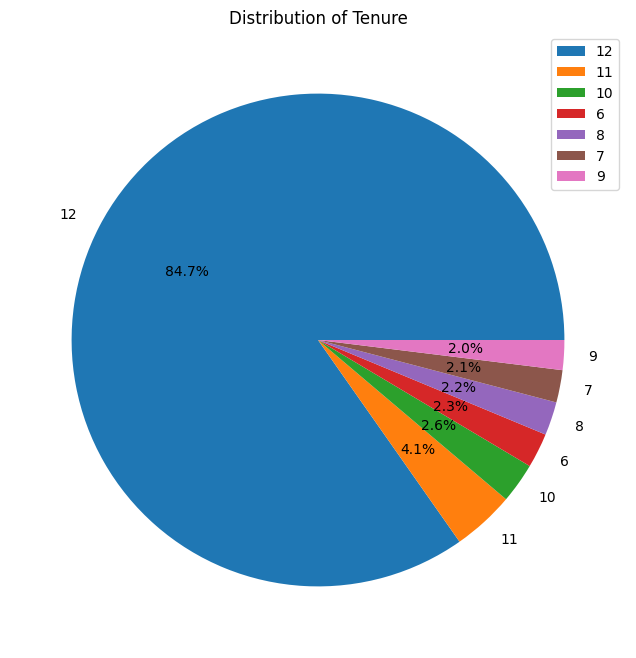

In [ ]:
df_v = pd.DataFrame(data['TENURE'].value_counts())

df_v = df_v.rename(columns={'count': 'TENURE'})
plot = df_v.plot.pie(y='TENURE', figsize=(8, 8), autopct='%1.1f%%')
plt.title('Distribution of Tenure')
plt.ylabel('')  # Hide the y-label for clarity in pie chart
plt.show()



The pie chart above displays the distribution of TENURE across different customers. Each segment represents the proportion of customers with different tenures in months.

### **Skewnness**

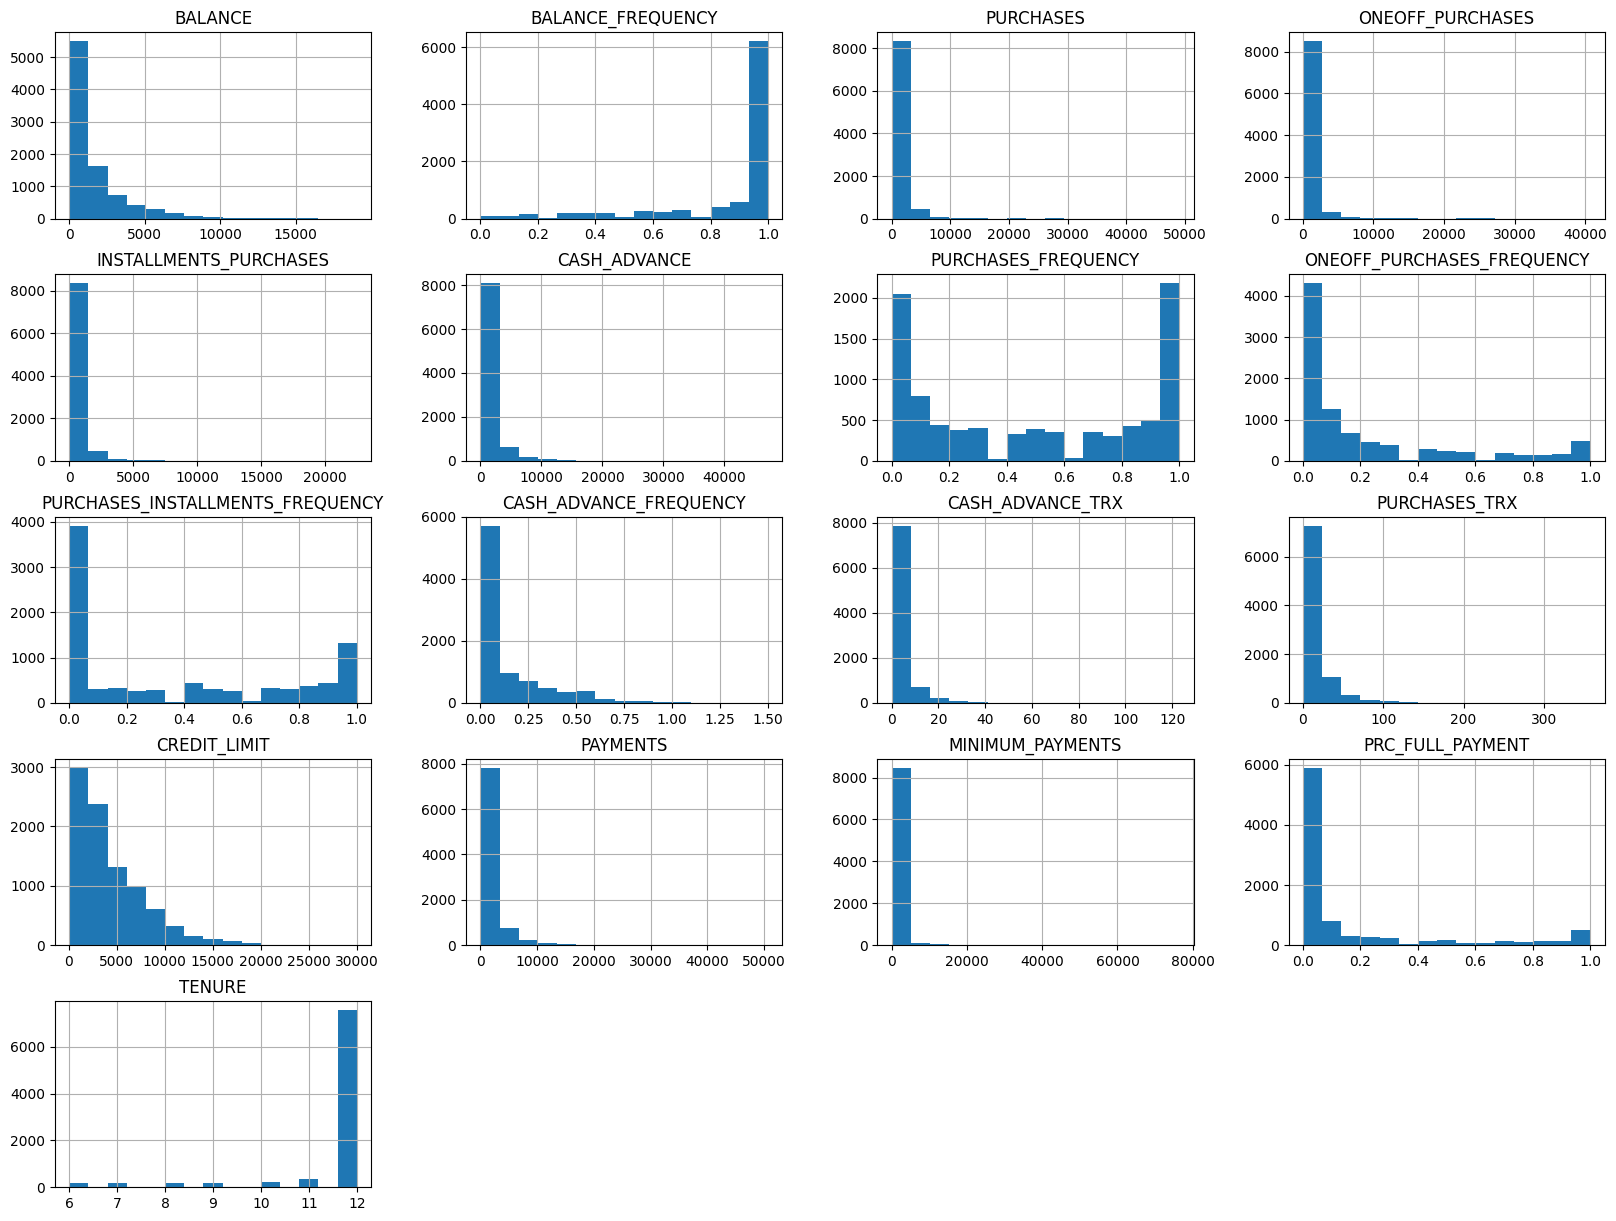

In [ ]:
data[numerical_cols].hist(bins=15, figsize=(20, 15), layout=(5, 4));



We note that there are skwewness in our data (right)

### **DATA INVESTIGATION**



In [ ]:
#  Checking data types and non-null values for each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
print("\n<-------------------------------------------------------->")
print("                 Handling Missing Values                 ")
print("<-------------------------------------------------------->")


# Checking missing values

missing_values = round(data.isnull().sum(axis=0)*100/data.shape[0],2)
print("Missing values in each column:\n", missing_values)


<-------------------------------------------------------->
                 Handling Missing Values                 
<-------------------------------------------------------->
Missing values in each column:
 CUST_ID                             0.00
BALANCE                             0.00
BALANCE_FREQUENCY                   0.00
PURCHASES                           0.00
ONEOFF_PURCHASES                    0.00
INSTALLMENTS_PURCHASES              0.00
CASH_ADVANCE                        0.00
PURCHASES_FREQUENCY                 0.00
ONEOFF_PURCHASES_FREQUENCY          0.00
PURCHASES_INSTALLMENTS_FREQUENCY    0.00
CASH_ADVANCE_FREQUENCY              0.00
CASH_ADVANCE_TRX                    0.00
PURCHASES_TRX                       0.00
CREDIT_LIMIT                        0.01
PAYMENTS                            0.00
MINIMUM_PAYMENTS                    3.50
PRC_FULL_PAYMENT                    0.00
TENURE                              0.00
dtype: float64


### **The dataset has missing values in two specific numerical columns:**

- MINIMUM_PAYMENTS: 313 missing values.
- CREDIT_LIMIT: 1 missing value.

## **HeatMap**

In [ ]:
numeric_columns = data.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()

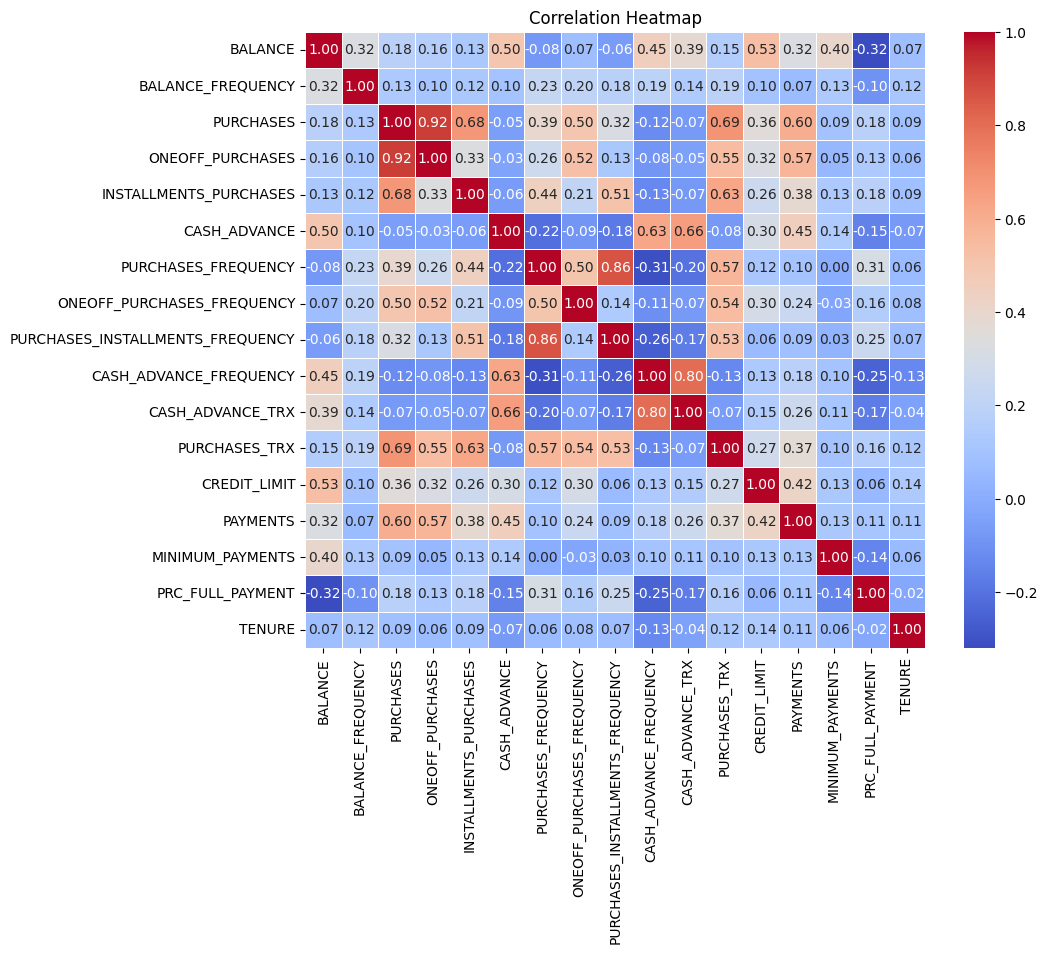

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

<Axes: >

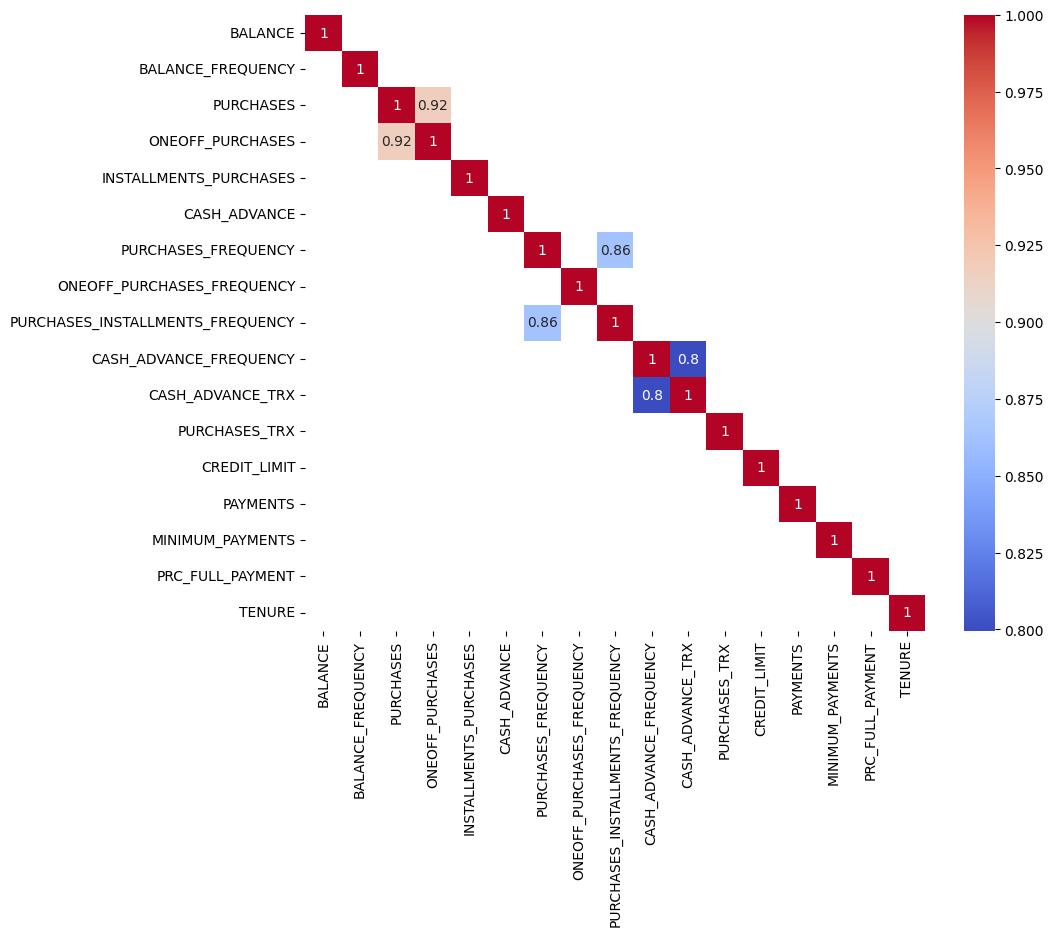

In [ ]:
plt.figure(figsize=(10,8))
coorlation = data.iloc[:,1:].corr()
thresh = 0.7
sns.heatmap(coorlation[abs(coorlation) > thresh] , annot=True,cmap='coolwarm')

### **Key Observations from the Heatmap**

- **PURCHASES and ONEOFF_PURCHASES** (0.92): Customers with high total purchases tend to have high one-off purchases.
- **PURCHASES_FREQUENCY and PURCHASES_TRX** (0.69): Higher purchase frequency is strongly related to a higher number of transactions.
- **MINIMUM_PAYMENTS and PAYMENTS** (0.60): The amount of minimum payments is positively correlated with the total payments made.
- **CREDIT_LIMIT and BALANCE** (0.53): Customers with a higher credit limit tend to have a higher balance.
- **CASH_ADVANCE_FREQUENCY and PRC_FULL_PAYMENT** (-0.31): Customers who frequently use cash advances are less likely to pay their balance in full.
- **CASH_ADVANCE_FREQUENCY and BALANCE** (-0.45): Those who take frequent cash advances tend to have lower balances.
- **TENURE** (customer tenure) has weak correlations with most variables (close to 0).
- **BALANCE_FREQUENCY** has weak correlations with most variables.
- **CASH_ADVANCE and ONEOFF_PURCHASES** (-0.05): There is little to no relationship between the amount of cash advance and the one-off purchases.
- **CREDIT_LIMIT and PURCHASES_FREQUENCY** (0.26): There is a moderate positive relationship, suggesting that customers with a higher credit limit may tend to make more frequent purchases.
- The diagonal from top-left to bottom-right is always 1 since every variable is perfectly correlated with itself.

## **Outlier Analysis**

([0, 1, 2, 3, 4],
 [Text(0, 0, 'BALANCE'),
  Text(1, 0, 'BALANCE_FREQUENCY'),
  Text(2, 0, 'PURCHASES'),
  Text(3, 0, 'ONEOFF_PURCHASES'),
  Text(4, 0, 'INSTALLMENTS_PURCHASES')])

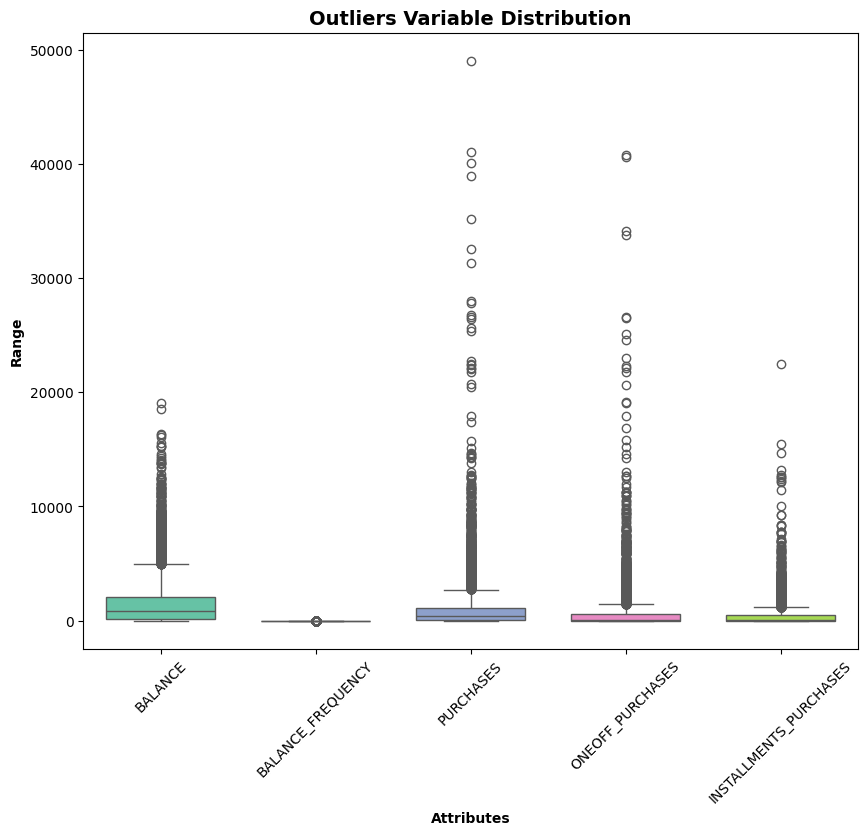

In [ ]:
# Outlier Analysis
import math # Import the math module

num_attributes = [x for x in data.columns if data[x].dtype in ('float64','int64')]
num_attributes_1 = num_attributes[:math.floor((len(num_attributes))/3)]
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = data[num_attributes_1], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')
plt.xticks(rotation=45)

### **Observations from the Plot:**

- BALANCE: The majority of the balance data lies below 10,000, but there are numerous outliers that go as high as 50,000.
These outliers indicate customers with significantly higher balances compared to the average.

- BALANCE_FREQUENCY: There are almost no outliers for this variable, and the data appears tightly clustered around a central value. This suggests a low variance in balance frequency, with most customers having a similar frequency of balance updates.

- PURCHASES: A substantial number of outliers exist in the purchases data, with values exceeding 20,000. This indicates that while most customers have moderate purchase amounts, a few customers have made significantly higher purchases.

- ONEOFF_PURCHASES: Similar to the PURCHASES variable, there are outliers that indicate large one-off purchase amounts. These are customers who made single large purchases.

- INSTALLMENTS_PURCHASES: There are some outliers but fewer compared to purchases and one-off purchases, indicating that installment purchases are more consistent, with fewer customers making unusually high purchases in installments.


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'CASH_ADVANCE'),
  Text(1, 0, 'PURCHASES_FREQUENCY'),
  Text(2, 0, 'ONEOFF_PURCHASES_FREQUENCY'),
  Text(3, 0, 'PURCHASES_INSTALLMENTS_FREQUENCY'),
  Text(4, 0, 'CASH_ADVANCE_FREQUENCY'),
  Text(5, 0, 'CASH_ADVANCE_TRX'),
  Text(6, 0, 'PURCHASES_TRX'),
  Text(7, 0, 'CREDIT_LIMIT')])

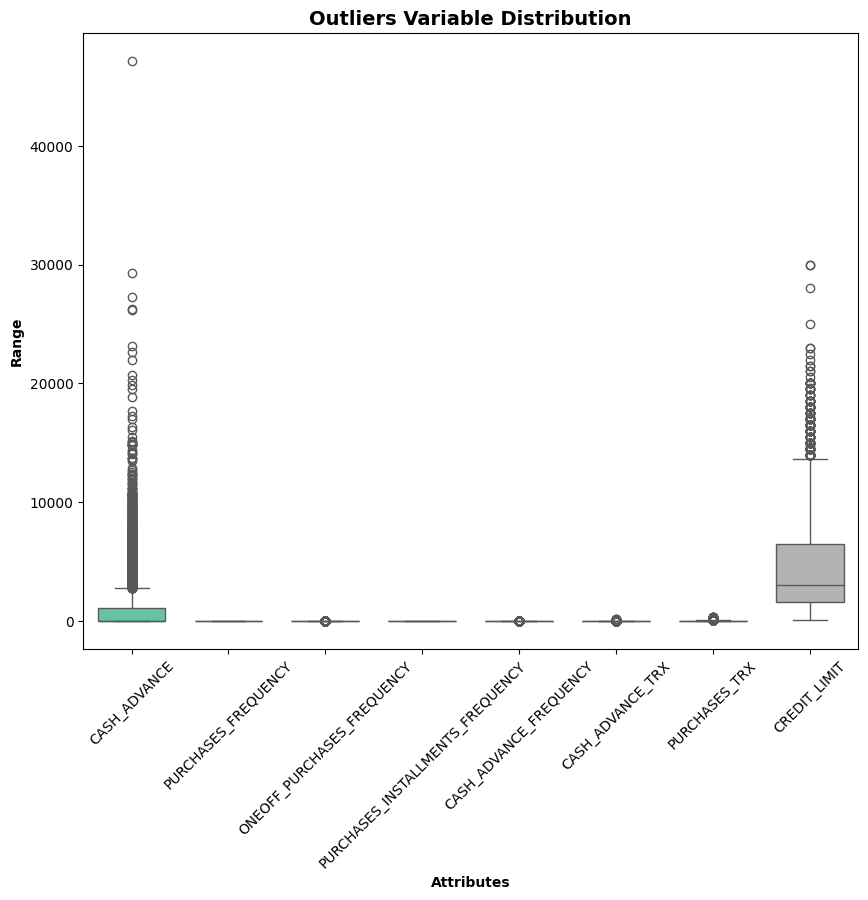

In [ ]:
num_attributes_2 = num_attributes[math.floor((len(num_attributes))/3):len(num_attributes)-4]
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = data[num_attributes_2], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')
plt.xticks(rotation=45)


### **Observations from the Plot:**

- **CASH_ADVANCE:** There are numerous outliers, with many values going above 10,000 and some even exceeding 40,000.
The majority of the data lies below 10,000, suggesting that a small number of customers have taken significantly large cash advances compared to the rest.

- **PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY**: These variables have very tight distributions, with almost no significant outliers. Most customers exhibit similar behavior in terms of purchase frequency and installment purchases, without many extremes.

- **CASH_ADVANCE_TRX:** This variable shows a few minor outliers, indicating that a small number of customers have made more frequent cash advance transactions than the rest.

- **PURCHASES_TRX:** This variable shows a few outliers as well, meaning a small group of customers have made an unusually high number of purchase transactions.

- **CREDIT_LIMIT:** There are quite a few outliers, with customers who have significantly higher credit limits compared to the majority. However, the distribution is less extreme compared to variables like CASH_ADVANCE.

## **Data preprocessing**

1. no need to cutomer ID so i will drop it and chek if there any duplicated data and drop
2. Big correlations between some columns
3. null values >> needed to fill
4. different scales and outliers
5. skwewness in our data (right)
6. CASH_ADVANCE_FREQUENCY column has values more than 1 which needed to remove

As we saw earlier, there are few null values


In [ ]:
nan1 = data [data ['MINIMUM_PAYMENTS'].isnull()]
nan1

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,C19160,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,C19170,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,C19176,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


 These null values can be filled with median

In [ ]:
nan2 = data [data ['CREDIT_LIMIT'].isnull()]
nan2

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


As there is just one row we will drop it later

In [ ]:
#make a copy for the original dataset
data_copy=data.copy()

### **Why remove CUST_ID ?**

**CUST_ID** is a unique identifier for each customer, meaning it doesn’t provide any valuable information for analysis, predictions, or patterns.


In [ ]:
#solution
data.drop(['CUST_ID'] , axis=1, inplace = True)

In [ ]:
data.duplicated ().sum ()

0

In [ ]:
#test
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### **Filling Missing Values**

For the numerical columns, the missing values were handled by filling them with the median value of the respective column. This approach was chosen to reduce the impact of extreme values (outliers) that could skew the results if the mean were used.

### **Why Median?**

The median was used instead of the mean because the data could be skewed. The median is a better measure of central tendency in skewed distributions as it is not affected by extreme values. For example, if a customer has an unusually high CREDIT_LIMIT, it won't affect the imputation process when using the median, ensuring a more stable dataset for analysis.

By filling the missing values with the median, the dataset is now ready for further analysis without any gaps in the numerical columns.

This approach ensures that the dataset retains its consistency and avoids the pitfalls of biased imputation.

In [ ]:
data.drop(['CASH_ADVANCE_FREQUENCY'] , axis=1, inplace = True)
data.dropna (subset = ['CREDIT_LIMIT'], inplace=True)
data.fillna(data.median() , inplace = True)



In [ ]:
#test
print(data.shape)
data.isnull().sum()

(8949, 16)


,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0
CASH_ADVANCE_TRX,0


As you can see our dataset is perfectly cleaned

### **Fourth issue (scalling and outliers) fifth issue (skewness in our data (right))**

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
rob_scaled_data = scaler.fit_transform(data)
rob_scaled_df = pd.DataFrame(rob_scaled_data, columns=data.columns)

In [ ]:
import pandas as pd # Make sure pandas is imported


rob_scaled_df = pd.DataFrame(rob_scaled_data, columns=data.columns)
rob_scaled_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.432387,-1.636364,-0.248596,-0.065763,0.013656,0.000000,-0.399999,-0.277777,-0.111112,0.00,-0.3125,-0.408163,-0.431661,-0.279912,0.000000,0.0
1,1.209127,-0.818182,-0.337724,-0.065763,-0.189907,5.784296,-0.600000,-0.277777,-0.222223,1.00,-0.4375,0.816327,2.138325,1.229899,1.555556,0.0
2,0.841881,0.000000,0.384615,1.272295,-0.189907,0.000000,0.600000,3.055557,-0.222223,0.00,0.3125,0.918367,-0.154807,0.509565,0.000000,0.0
3,0.411728,-3.272727,1.062726,2.528425,-0.189907,0.184751,-0.500000,0.000000,-0.222223,0.25,-0.3750,0.918367,-0.564601,0.000000,0.000000,0.0
4,-0.029058,0.000000,-0.322776,-0.038073,-0.189907,0.000000,-0.500000,0.000000,-0.222223,0.00,-0.3750,-0.367347,-0.117739,-0.109511,0.000000,0.0


In [ ]:
rob_scaled_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.432387,-1.636364,-0.248596,-0.065763,0.013656,0.000000,-0.399999,-0.277777,-0.111112,0.00,-0.3125,-0.408163,-0.431661,-0.279912,0.000000,0.0
1,1.209127,-0.818182,-0.337724,-0.065763,-0.189907,5.784296,-0.600000,-0.277777,-0.222223,1.00,-0.4375,0.816327,2.138325,1.229899,1.555556,0.0
2,0.841881,0.000000,0.384615,1.272295,-0.189907,0.000000,0.600000,3.055557,-0.222223,0.00,0.3125,0.918367,-0.154807,0.509565,0.000000,0.0
3,0.411728,-3.272727,1.062726,2.528425,-0.189907,0.184751,-0.500000,0.000000,-0.222223,0.25,-0.3750,0.918367,-0.564601,0.000000,0.000000,0.0
4,-0.029058,0.000000,-0.322776,-0.038073,-0.189907,0.000000,-0.500000,0.000000,-0.222223,0.00,-0.3750,-0.367347,-0.117739,-0.109511,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,-0.438828,0.000000,-0.065744,-0.065763,0.431281,0.000000,0.600000,-0.277777,0.888888,0.00,-0.0625,-0.408163,-0.350112,-0.426588,3.500004,-6.0
8945,-0.443662,0.000000,-0.057447,-0.065763,0.450229,0.000000,0.600000,-0.277777,0.888888,0.00,-0.0625,-0.408163,-0.382874,0.000000,0.000000,-6.0
8946,-0.441474,-1.500005,-0.202818,-0.065763,0.118212,0.000000,0.399999,-0.277777,0.666667,0.00,-0.1250,-0.408163,-0.511063,-0.372316,1.750002,-6.0
8947,-0.446635,-1.500005,-0.337724,-0.065763,-0.189907,0.032821,-0.600000,-0.277777,-0.222223,0.50,-0.4375,-0.510204,-0.529983,-0.415470,1.750002,-6.0


<Axes: xlabel='ONEOFF_PURCHASES', ylabel='Count'>

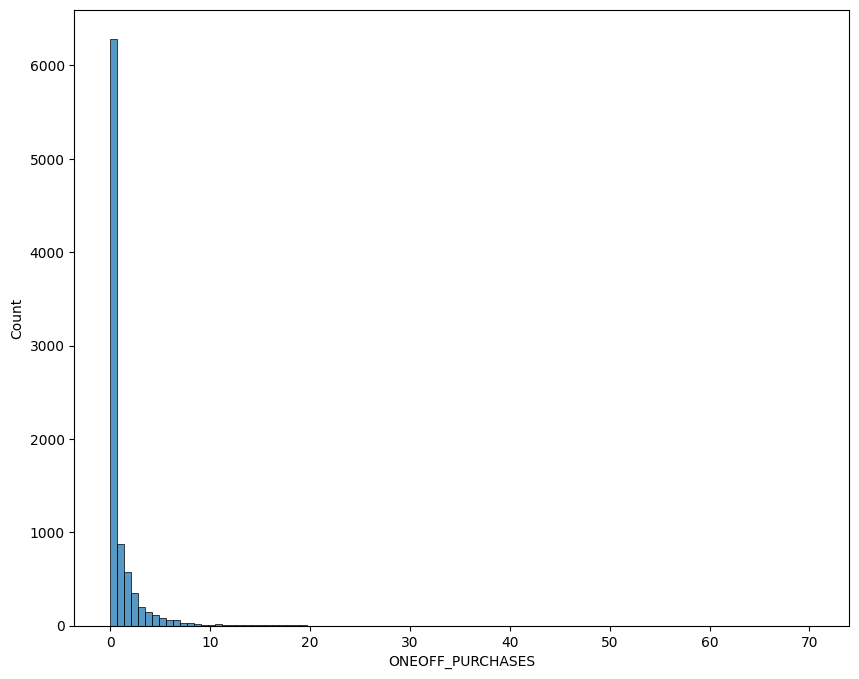

In [ ]:
#test
plt.figure(figsize=(10, 8))
sns.histplot(data=rob_scaled_df,x=rob_scaled_df[ 'ONEOFF_PURCHASES'],bins=100)

### **Feature Transformation**

We will also test "quantile_transform" as we have outliers in our data and the suitable scaler appears to be robust.

**Leveraging quantile information to transform features.**
- By using this procedure, the features are changed to have a normal or uniform distribution.
- Consequently, this transformation tends to disperse the most frequent values for a given feature.
- This preprocessing approach is resilient because it also lessens the influence of (marginal) outliers.

## **Normalization**

### **Using QuantileTransformer():**

In [ ]:
from sklearn.preprocessing import QuantileTransformer

scaler2 = QuantileTransformer()
Quant_transformed_data = scaler2.fit_transform(data)
Quant_transformed_data1 = pd.DataFrame(Quant_transformed_data, columns=data.columns)
Quant_transformed_data1

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.141593,0.213714,0.306357,0.000000,0.506448,0.000000,0.341842,0.000000,0.452452,0.000000,0.323824,0.058559,0.117332,0.155864,0.000000,1.0
1,0.850755,0.282783,0.000000,0.000000,0.000000,0.973715,0.000000,0.000000,0.000000,0.755756,0.000000,0.789289,0.907342,0.815178,0.790791,1.0
2,0.792956,1.000000,0.668288,0.790728,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.650150,0.821822,0.398543,0.693666,0.000000,1.0
3,0.694262,0.147648,0.811490,0.891697,0.000000,0.592325,0.265766,0.542543,0.000000,0.566567,0.265766,0.821822,0.000000,0.500000,0.000000,1.0
4,0.484648,1.000000,0.233496,0.485857,0.000000,0.000000,0.265766,0.542543,0.000000,0.000000,0.265766,0.128629,0.425604,0.419606,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,0.113700,1.000000,0.455788,0.000000,0.655347,0.000000,1.000000,0.000000,0.780781,0.000000,0.461461,0.058559,0.208798,0.026116,0.865866,0.0
8945,0.085715,1.000000,0.461962,0.000000,0.661161,0.000000,1.000000,0.000000,0.780781,0.000000,0.461461,0.058559,0.167432,0.500000,0.000000,0.0
8946,0.099349,0.232733,0.346339,0.000000,0.549055,0.000000,0.678178,0.000000,0.704204,0.000000,0.426927,0.058559,0.046449,0.059630,0.800801,0.0
8947,0.065990,0.232733,0.000000,0.000000,0.000000,0.523864,0.000000,0.000000,0.000000,0.650651,0.000000,0.010010,0.034916,0.030983,0.800801,0.0


### **Using log transformation:**

Log transformation is commonly used when a variable is right-skewed and since we our facing similar situaton we'll be using Log Transformation


In [ ]:
log_transform_data=(np.log(data+0.1)) # The dataset must not contain negative values before applying the log transformation. That's why 0.1 is added to each value to prevent issues with taking the logarithm of zero or negative numbers
log_transform_data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3.713590,-0.085360,4.559126,-2.302585,4.559126,-2.302585,-1.321755,-2.302585,-1.696451,-2.302585,0.741937,6.907855,5.307783,4.938851,-2.302585,2.493205
1,8.071708,0.009050,-2.302585,-2.302585,-2.302585,8.770757,-2.302585,-2.302585,-2.302585,1.410987,-2.302585,8.853680,8.319506,6.977692,-1.132515,2.493205
2,7.822144,0.095310,6.650628,6.650628,-2.302585,-2.302585,0.095310,0.095310,-2.302585,-2.302585,2.493205,8.922672,6.433208,6.441560,-2.302585,2.493205
3,7.418643,-0.306031,7.312620,7.312620,-2.302585,5.327332,-1.696451,-1.696451,-2.302585,0.095310,0.095310,8.922672,-2.302585,5.744772,-2.302585,2.493205
4,6.706635,0.095310,2.778819,2.778819,-2.302585,-2.302585,-1.696451,-1.696451,-2.302585,-2.302585,0.095310,7.090160,6.519788,5.500814,-2.302585,2.493205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,3.353180,0.095310,5.674079,-2.302585,5.674079,-2.302585,0.095310,-2.302585,-0.068993,-2.302585,1.808289,6.907855,5.785960,3.891542,-0.510826,1.808289
8946,2.959235,0.095310,5.704116,-2.302585,5.704116,-2.302585,0.095310,-2.302585,-0.068993,-2.302585,1.808289,6.907855,5.620261,5.744772,-2.302585,1.808289
8947,3.156944,-0.068993,4.973280,-2.302585,4.973280,-2.302585,-0.068993,-2.302585,-0.265703,-2.302585,1.629241,6.907855,4.399016,4.413021,-1.049822,1.808289
8948,2.606945,-0.068993,-2.302585,-2.302585,-2.302585,3.601653,-2.302585,-2.302585,-2.302585,0.741937,-2.302585,6.214808,3.963665,4.022770,-1.049822,1.808289


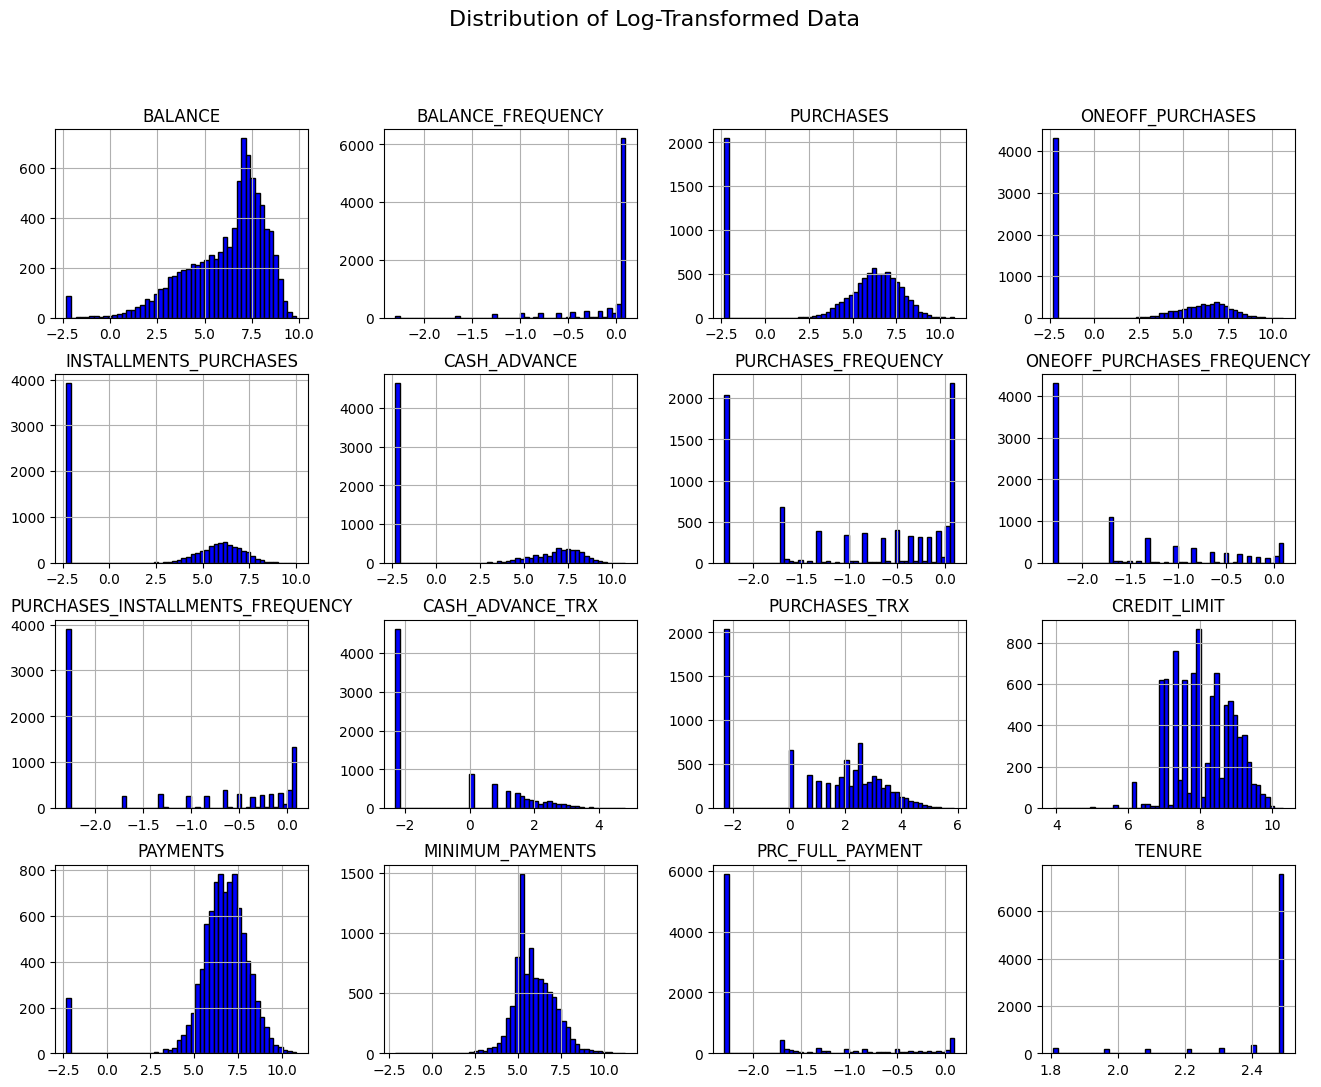

In [ ]:
# Plotting histograms to visualize the effect of log transformation
log_transform_data.hist(figsize=(16, 12), bins=50, color='blue', edgecolor='black')
plt.suptitle('Distribution of Log-Transformed Data', fontsize=16)
plt.show()


This visualization shows how the distribution of each feature has changed after applying the logarithmic transformation, which is useful for detecting skewness and observing the effect of the transformation.

The log transformation has successfully compressed large values and helped reduce skewness in several variables, particularly for BALANCE, PURCHASES, CREDIT_LIMIT, and MINIMUM_PAYMENTS. This transformation will improve the performance of machine learning models that assume normally distributed data.

## **t-SNE (t-distributed Stochastic Neighbor Embedding)**

t-SNE (t-distributed Stochastic Neighbor Embedding) is a technique used to visualize high-dimensional data by reducing it to two or three dimensions. It is widely used for tasks such as clustering and dimensionality reduction, making complex datasets easier to visualize and interpret.


To use t-SNE, we'll focus on the numerical features in your dataset and reduce them to 2D or 3D for visualization.

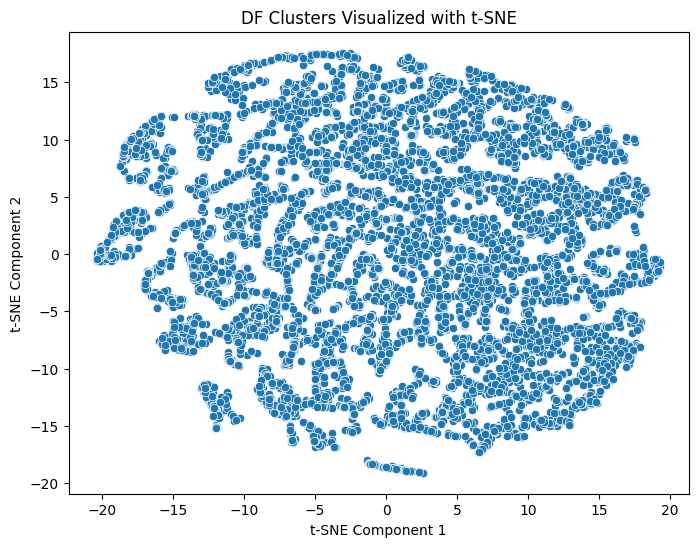

In [ ]:
tsne_data = TSNE(n_components=2,  perplexity=20, learning_rate=0.5, n_iter=2000)
X_tsne = tsne_data.fit_transform(data)

# Add the cluster information to the reduced data
data_tsne = pd.DataFrame(data=X_tsne, columns=['t-SNE Component 1', 't-SNE Component 2'])

# Plotting
plt.figure (figsize=(8,6))
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', data=data_tsne)
plt.title('DF Clusters Visualized with t-SNE')
plt.show()

1. **Purpose of t-SNE in the Dataset:** We have applied t-SNE to reduce the dimensionality of the high-dimensional dataset to 2 dimensions.
2. **The goal of the t-SNE** is to project the data points in 2D space, where similar customer profiles are grouped closer together, and dissimilar profiles are farther apart.
3. Each point in the plot represents a customer in our dataset. The x-axis and y-axis represent the two components produced by t-SNE, which are low-dimensional representations of the high-dimensional credit card data.
4. **Interpretation of the Clusters:**
      - **Densely Packed Areas:** Some regions of the plot show clusters of points packed closely together. These represent groups of customers with similar profiles, such as those with similar balances, payment behavior, or credit limits.
      -  **Sparser Areas:** Some points are more scattered or isolated, which  suggest that these customers are outliers or have unique spending patterns compared to the majority.

**Insights for Further Analysis:**

1. **Customer Segmentation:** The t-SNE visualization helps in identifying potential clusters for customer segmentation. We can group customers with similar behaviors for marketing, credit risk analysis, or personalized offers.
2. **Outlier Detection:** Points far from clusters may represent outliers.These outliers might represent customers who exhibit unusual spending or credit behavior (e.g., very high balances, infrequent purchases).
3. **Behavioral Patterns:** By analyzing clusters, you can gain insights into different behavioral patterns such as frequent cash advances, installment purchases, or low balance usage.


### T-SNE on rob_scaled_data

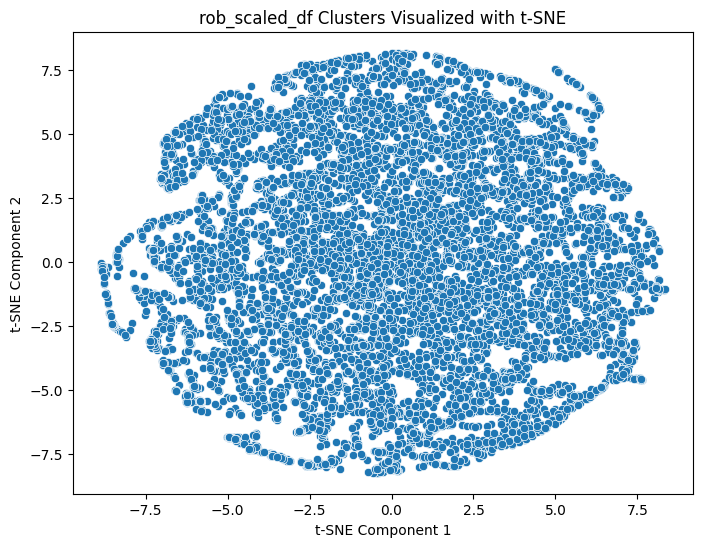

In [ ]:
tsne_data = TSNE(n_components=2,  perplexity=10, learning_rate=0.1, n_iter=2000)
X_tsne = tsne_data.fit_transform(rob_scaled_df)

# Add the cluster information to the reduced data
rob_scaled_data_tsne = pd.DataFrame(data=X_tsne, columns=['t-SNE Component 1', 't-SNE Component 2'])

# Plotting
plt.figure (figsize=(8,6))
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', data=rob_scaled_data_tsne)
plt.title('rob_scaled_df Clusters Visualized with t-SNE')
plt.show()

In the previous plot, the points exhibit more separation, indicating potential distinct groupings or clusters in the data.
In this plot, the points are densely packed with no obvious separations or gaps between clusters.


### T-SNE on Quant_transformed_df

Quant_transformed_df with log

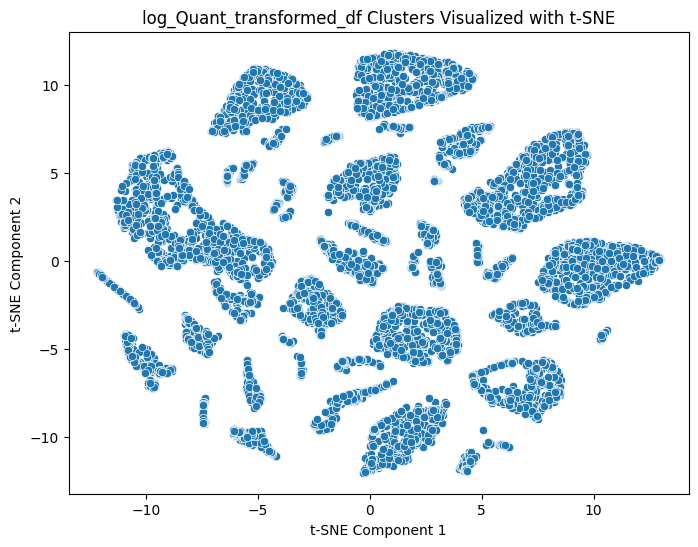

In [ ]:
log_Quant_transformed_data = np.log(Quant_transformed_data+0.1)
tsne_data = TSNE(n_components=2,  perplexity=40, learning_rate=0.2, n_iter=2000)
X_tsne = tsne_data.fit_transform(log_Quant_transformed_data)

# Add the cluster information to the reduced data
log_Quant_transformed_data_tsne = pd.DataFrame(data=X_tsne, columns=['t-SNE Component 1', 't-SNE Component 2'])

# Plotting
plt.figure (figsize=(8,6))
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', data=log_Quant_transformed_data_tsne)
plt.title('log_Quant_transformed_df Clusters Visualized with t-SNE')
plt.show()

This plot visualizes the t-SNE result after applying logarithmic transformation and quantile transformation to the dataset.
1. **Cluster Structures:** The points are grouped into distinct clusters with clear separations between them. The clusters are relatively spread out and well-defined, indicating that the transformed data preserves distinct groups of customers or data points.
2. **Effect of Logarithmic Transformation**: The logarithmic transformation have compressed large values, making the distribution more uniform and leading to clearer cluster separations. **This is especially useful for datasets with highly skewed distributions.**

Quant_transformed_df without log

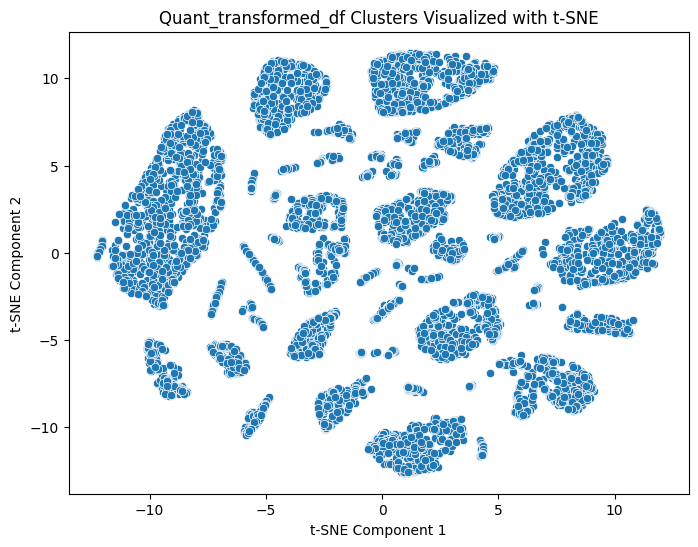

In [ ]:
tsne_data = TSNE(n_components=2,  perplexity=40, learning_rate=0.2, n_iter=2000)
X_tsne = tsne_data.fit_transform(Quant_transformed_data)

# Add the cluster information to the reduced data
Quant_transformed_data_tsne = pd.DataFrame(data=X_tsne, columns=['t-SNE Component 1', 't-SNE Component 2'])

# Plotting
plt.figure (figsize=(8,6))
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', data=Quant_transformed_data_tsne)
plt.title('Quant_transformed_df Clusters Visualized with t-SNE')
plt.show()


This plot visualizes the t-SNE result after applying only quantile transformation (without the logarithmic step).
1. **Cluster Structures:** The clusters in this image are also distinct and well-separated, similar to the first image. However, there are subtle differences in the density and spread of the clusters. Some areas might be slightly denser, and some clusters seem to have a different shape compared to the first image.
2. **Effect of Quantile Transformation:** Quantile transformation reshapes the data to follow a specific distribution (uniform or normal), which can help in clustering by bringing data points into comparable ranges.

T-SNE on log_transform_df

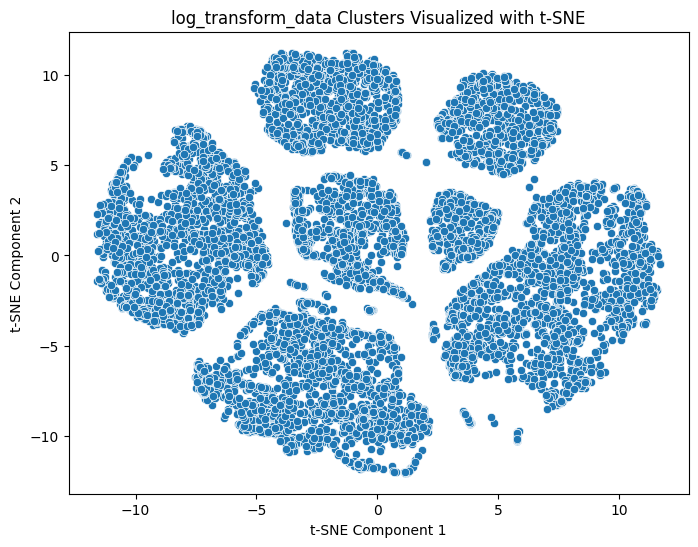

In [ ]:
tsne_log_transform_data = TSNE(n_components=2,  perplexity=40, learning_rate=0.2, n_iter=2000)
X_tsne = tsne_data.fit_transform(log_transform_data)

# Add the cluster information to the reduced data
log_transform_data_tsne = pd.DataFrame(data=X_tsne, columns=['t-SNE Component 1', 't-SNE Component 2'])

# Plotting
plt.figure (figsize=(8,6))
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', data=log_transform_data_tsne)
plt.title('log_transform_data Clusters Visualized with t-SNE')
plt.show()


This t-SNE plot shows distinct and well-separated clusters after applying log transformation, which indicates the presence of underlying patterns or segments in the dataset. The log transformation has likely improved the clarity of these clusters by handling the skewness or outliers in the original data.



### **Summary of all the plots**

1. **rob_scaled_df Clusters Visualized with t-SNE**
- Summary: This image represents a t-SNE visualization of a dataset after applying scaling using robust scaling. The data points are densely packed with no clear cluster separations. The local structures are emphasized more due to the lower perplexity (10), resulting in a more uniform distribution of points.
- Main Observations:
No distinct clusters are visible.
The data points are uniformly distributed, indicating a focus on local relationships rather than global clusters.
- Conclusion: The low perplexity and learning rate smooth out the clusters, making it harder to distinguish clear groupings.

2. **log_Quant_transformed_df Clusters Visualized with t-SNE**
- Summary: This plot shows the t-SNE visualization of the data after applying both log transformation and quantile transformation. The result is a series of distinct clusters with clear separations, suggesting the transformations helped in normalizing the data.
- Main Observations:
Distinct clusters with clear separation.
Log transformation helped compress large values and better reveal cluster structures.
- Conclusion: This combination of transformations leads to a better-defined separation of data points, making cluster patterns more visible.


3. **Quant_transformed_df Clusters Visualized with t-SNE**
- Summary: This visualization uses quantile transformation without the log transformation. The clusters are still visible and separated, but there are subtle differences compared to the previous image, such as the density of points and slight overlaps.
- Main Observations:
Clusters are still visible, but there’s less separation compared to the log+quantile transformation.
Points seem slightly more compressed.
- Conclusion: Quantile transformation alone is effective, but adding a log transformation seems to improve cluster visibility further.

4. **log_transform_data Clusters Visualized with t-SNE**
- Summary: This plot shows the result of t-SNE after applying only a log transformation to the dataset. The clusters are highly distinct and separated, similar to the log+quantile transformation but slightly denser.
- Main Observations:
Clear and distinct clusters, with minimal overlap.
Log transformation improved the normalization of skewed features, making clusters more defined.
- Conclusion: The log transformation alone performs well at revealing distinct groups within the data, similar to the combination of transformations.

## **K Means**

k_means on data without any transformation

Steps:
1. We'll first create a KMeans model with n_clusters=5 and fit it to the data.
2. After fitting the model, we will use the predict method to assign each data point to a cluster and retrieve the centroids using the cluster centers attributes.
3. Then, we will visualize the clusters by T_sne
4. Finally we will be evaluating the model using different methods

In [ ]:
# Create and fit the KMeans model
kmeans_model_1 = KMeans(n_clusters=5, random_state=42)
kmeans_model_1.fit(data)

KMeans(n_clusters=5, random_state=42)

In [ ]:
# Predict clusters and find centroids
y_kmeans = kmeans_model_1.predict(data)
centroids = kmeans_model_1.cluster_centers_

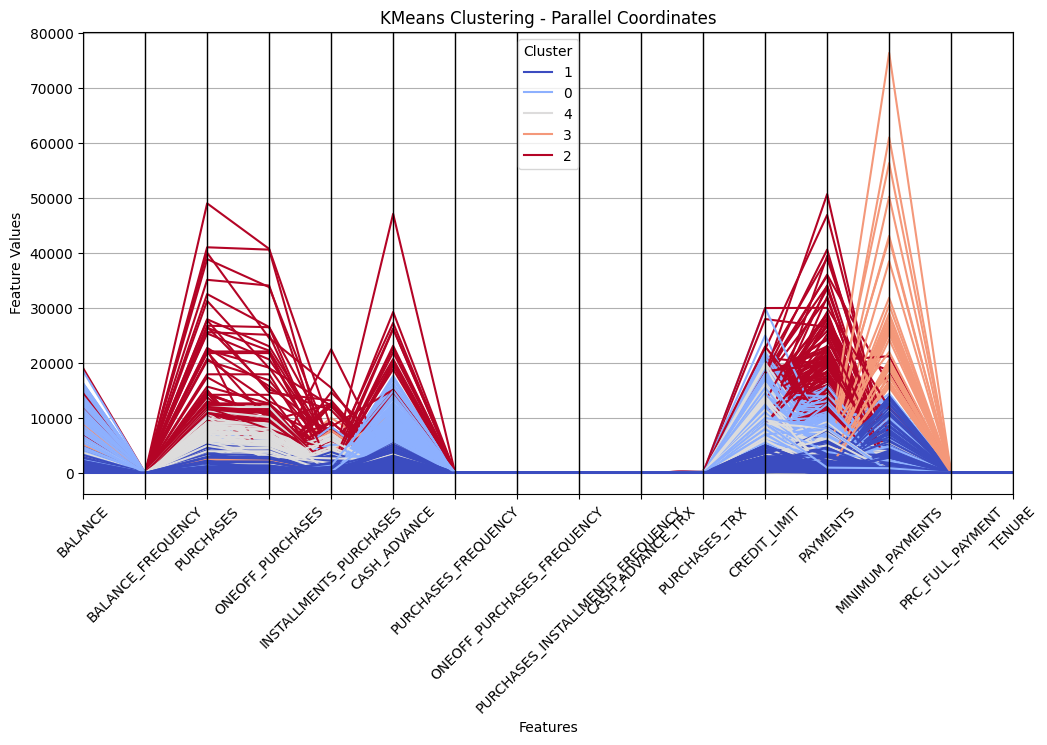

In [ ]:
data['Cluster'] = y_kmeans
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(12, 6))
parallel_coordinates(data, 'Cluster', colormap='coolwarm')
plt.title('KMeans Clustering - Parallel Coordinates')
plt.xlabel('Features')
plt.ylabel('Feature Values')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.show()

**Colors:** There are 5 clusters in total, each represented by a different color.
1. Blue (Cluster 1): Represents one group of customers.
2. Black (Cluster 0): Represents another group with specific patterns.
3. Red (Cluster 3): Represents a third group with distinct behaviors.
4. Orange (Cluster 2): Represents a fourth cluster, likely with high outliers in payments.
5. Gray (Cluster 4): Represents a smaller group with specific features.

**Feature Behavior Across Clusters:**

1. **BALANCE and CASH_ADVANCE:**
Cluster 3 (red) has the highest values for features like BALANCE, CASH_ADVANCE, and MINIMUM_PAYMENTS, indicating that this group likely represents customers with high balances and frequent cash advances.
In contrast, Cluster 1 (blue) has consistently low values across all features, which might represent customers with low balances and fewer transactions.
2. **CREDIT_LIMIT:**
Cluster 3 (red) also seems to have higher credit limits than the other clusters, while Cluster 1 (blue) has very low or zero credit limits.
3. **PAYMENTS:**
Cluster 2 (orange) shows extremely high PAYMENTS and MINIMUM_PAYMENTS, suggesting that this group makes large payments, possibly high-paying customers or those who clear their balances frequently.
PURCHASES and ONEOFF_PURCHASES:
Cluster 4 (gray) shows a moderate level of purchases, while Cluster 1 (blue) has very low values for purchases and transactions.
4. **TENURE:**
For some clusters, tenure remains relatively consistent, but the parallel coordinates plot does not reveal significant variation in this feature across clusters.

**Elbow method to determine the best K**

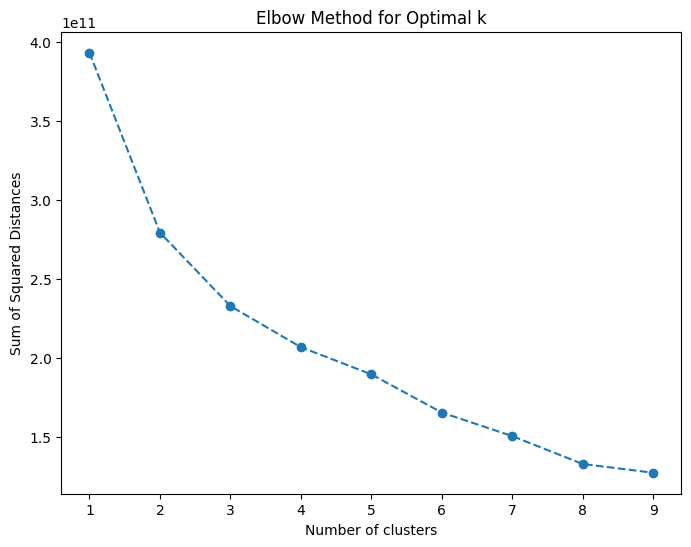

In [51]:
sse=[]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure (figsize=(8,6))
plt.plot(range(1, 10), sse, marker='o', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal k')
plt.show()


- The **Elbow Method** is a technique used to determine the optimal number of clusters (k) by plotting the sum of squared distances (inertia) between data points and their corresponding cluster centroids as a function of the number of clusters.

- The goal of this method is to find the "elbow point" in the graph, where adding more clusters does not significantly reduce the sum of squared distances (inertia).

- As we increase the number of clusters (k), the inertia will always decrease because having more clusters allows points to be closer to their assigned centroids. However, after a certain point, the improvement becomes marginal, and adding more clusters provides diminishing returns.

- In this plot, the elbow seems to appear **around k = 3 or 4**.

- At k = 3 or 4, there is a significant drop in inertia, but after that point, the decrease in inertia becomes more gradual, indicating that adding more clusters does not improve the clustering significantly.

In [53]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
# Import the missing function:
from sklearn.metrics import calinski_harabasz_score # This line is added to import the function
import matplotlib.pyplot as plt


# inertia
inertia = kmeans_model_1.inertia_
print("Inertia:", inertia)

# Silhouette Score
silhouette_avg = silhouette_score(data, y_kmeans)
print("Silhouette Score:", silhouette_avg)

# Calinski-Harabasz Index
ch_index = calinski_harabasz_score(data, y_kmeans) # Now the function is recognized
print("Calinski-Harabasz Index:", ch_index)

# Davies-Bouldin Index
db_index = davies_bouldin_score(data, y_kmeans)
print("Davies-Bouldin Index:", db_index)

Inertia: 182431385306.17804
Silhouette Score: 0.4061188349290728
Calinski-Harabasz Index: 2582.6445219216603
Davies-Bouldin Index: 1.2489974363464278


- **Silhouette Score:** Silhouette score measures how similar an object is to its own cluster compared to other clusters. Compute the silhouette score for different values of K and choose the K with the highest silhouette score. Higher scores indicate better-defined clusters.​
- **Calinski-Harabasz Index:** Calinski-Harabasz index measures the ratio of between-cluster dispersion to within-cluster dispersion. Compute the index for different values of K and choose the K with the highest index. Higher values indicate better clustering.
- **Davies-Bouldin Index:** Davies-Bouldin index measures the average similarity between each cluster and its most similar cluster. Compute the index for different values of K and choose the K with the lowest index.

 Lower values indicate better clustering.

**Summary of Metrics:**
- **Inertia:** The inertia is large, but that's typical for large datasets. It indicates the compactness of the clusters.
- **Silhouette Score:** A score of 0.4061 suggests that the clusters are moderately well-separated but could be improved.
- **Calinski-Harabasz Index:** A score of 2582.6445 indicates reasonable separation and compactness of clusters.
- **Davies-Bouldin Index:** A score of 1.249 shows that the clusters are reasonably well-separated, though some overlap may exist.

We'll go ahead with the Silhouette Score

In [54]:
# Define a range of K values to try
parameter_grid = {'n_clusters': [ 4, 5, 6]}


In [55]:
# Create KMeans model
kmeans_model = KMeans(random_state=42)

In [57]:
!pip install scikit-learn
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import make_scorer, silhouette_score

# Perform grid search using silhouette score as the scoring metric
grid_search = GridSearchCV(kmeans_model, parameter_grid, cv=5, scoring=make_scorer(silhouette_score))
grid_search.fit(data)


GridSearchCV(cv=5, estimator=KMeans(random_state=42),
             param_grid={'n_clusters': [4, 5, 6]},
             scoring=make_scorer(silhouette_score, response_method='predict'))

In [58]:
# Get the best K value
best_kmeans_score = grid_search.best_params_['n_clusters']
best_kmeans_score

4

In [60]:
# Train the KMeans model with the best K value
best_kmeans_model = KMeans(n_clusters=best_kmeans_score, random_state=42) # Use best_kmeans_score instead of best_k
best_kmeans_model.fit(data)

# Predict clusters
y_kmeans = best_kmeans_model.predict(data)

# Evaluate clustering performance using the best K value
silhouette_avg = silhouette_score(data, y_kmeans)
print("Best K:", best_kmeans_score) # Use best_kmeans_score instead of best_k
print("Silhouette Score:", silhouette_avg)

Best K: 4
Silhouette Score: 0.46685894922202836


In [61]:
best_kmeans_model.labels_

array([1, 0, 0, ..., 1, 1, 1], dtype=int32)

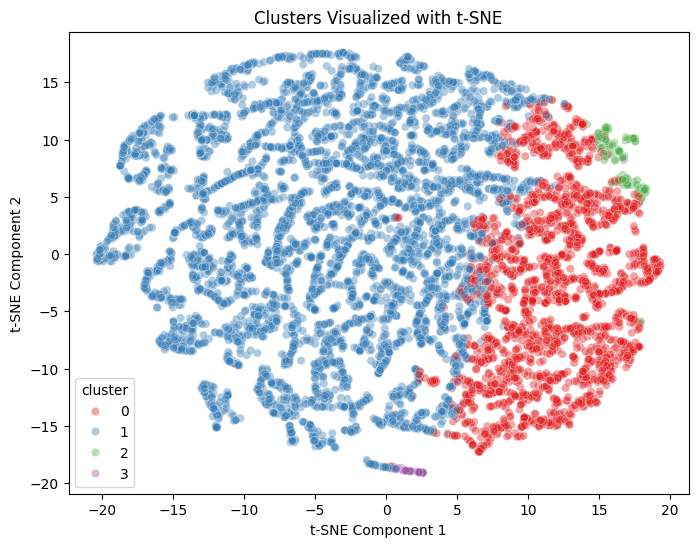

In [62]:
data_tsne['cluster'] = best_kmeans_model.labels_

# Plotting
plt.figure (figsize=(8,6))
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', hue='cluster', data=data_tsne, palette='Set1', alpha=0.4 )
plt.title('Clusters Visualized with t-SNE')
plt.show()